실습과제   

2. 제공 되는 'Floating_Population_2004.csv' 파일을 Pandas를 이용하여 분석한 결과를 jupyter notebook에 공통사항에 맞추어 작성하여 제출한다.

# 문제 정의 : 서울시 유동인구 분석   
   
- DataSet 구성
    1. 일자 : 유동 인구를 수집한 날짜( 2020/04/01 ~ 2020/04/30 )
    2. 시간 : 유동 인구를 수집한 시간( 0시 ~ 23시, 1시간 단위 수집 )
    3. 연령대 : 유동 인구를 수집한 연령대( 20대 ~ 70대 )
    4. 시 : 유동 인구를 수집한 시( 서울시 )
    5. 구 : 유동 인구를 수집한 구( 서울 25개구 )
    6. 유동인구수

# 2. 수집한 DataSet을 DataFrame으로 생성되는 과정에 대한 정리


## 2.1 NumPy / Pandas import

In [3]:
import numpy as np
import pandas as pd

## 2.2 데이터 읽기( Floating_Population_2004.csv )

In [4]:
df = pd.read_csv( 'Floating_Population_2004.csv', encoding = 'utf-8' )

## 2.3 읽은 데이터 확인

In [5]:
df.shape

(216000, 7)

In [6]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200401,0,20,남성,서울,도봉구,21490
1,20200401,0,30,여성,서울,동대문구,27260
2,20200401,0,50,남성,서울,구로구,35670
3,20200401,1,30,여성,서울,강남구,52380
4,20200401,1,40,남성,서울,동대문구,28420


In [7]:
df.tail()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215995,20200430,22,40,여성,서울,성동구,22150
215996,20200430,22,50,여성,서울,서대문구,23270
215997,20200430,23,20,여성,서울,용산구,18570
215998,20200430,23,30,여성,서울,서대문구,21100
215999,20200430,23,40,남성,서울,강남구,45730


## 2.4 DataFrame에 대한 정보

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   시           216000 non-null  object
 5   군구          216000 non-null  object
 6   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 11.5+ MB


In [9]:
df.dtypes

일자             int64
시간(1시간단위)      int64
연령대(10세단위)     int64
성별            object
시             object
군구            object
유동인구수          int64
dtype: object

## 2.5 DataFrame에 대한 가공

### 2.5.1 불필요한 행( 변수 ) 삭제

In [10]:
df.drop( '시', axis = 1, inplace = True )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   군구          216000 non-null  object
 5   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


In [12]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,군구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


### 2.5.2 열( 변수 ) 이름 변경

In [14]:
column_name = [ 'date', 'time', 'age', 'gender', 'gu', 'move_population' ]
df.columns = index_name

In [15]:
df.head()

,date,time,age,gender,gu,move_population
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


### 2.5.3 날짜, 시간, 성별, 연령대, 구 목록 생성( 중복 data 배제 방법 )

In [20]:
# 데이터 수집 일자 날짜 목록 생성
date_list = df.date.unique()

print('데이터 수집일 :' )
for date in date_list:
    print( '{}'.format( date ), end = '\t')
print( '\n\n데이터 수집 일수 : {}일'.format( date_list.size ) )

데이터 수집일 :
20200401	20200402	20200403	20200404	20200405	20200406	20200407	20200408	20200409	20200410	20200411	20200412	20200413	20200414	20200415	20200416	20200417	20200418	20200419	20200420	20200421	20200422	20200423	20200424	20200425	20200426	20200427	20200428	20200429	20200430	

데이터 수집 일수 : 30일


In [23]:
# 데이터 수집 시간 목록 생성
time_list = df.time.unique()

print('데이터 수집 시간 :' )
for time in time_list:
    print( '{}'.format( time ), end = '\t')
print( '\n\n데이터 수집 시간 수 : {}시간'.format( time_list.size ) )

데이터 수집 시간대 :
0	1	2	3	4	5	6	7	8	9	10	12	13	14	15	16	17	18	19	20	21	22	23	11	

데이터 수집 시간대 수 : 24시간


In [24]:
# 데이터 수집 성별 목록 생성
gender_list = df.gender.unique()

print('데이터 수집 성별 :' )
for gender in gender_list:
    print( '{}'.format( gender ), end = '\t')
print( '\n\n데이터 수집 성별 분류 : {}부류'.format( gender_list.size ) )

데이터 수집 성별 :
남성	여성	

데이터 수집 성별수 : 2부류


In [25]:
# 데이터 수집 연령대 목록 생성
age_list = df.age.unique()

print('데이터 수집 연령대 :' )
for age in age_list:
    print( '{}'.format( age ), end = '\t')
print( '\n\n데이터 수집 연령대 종류 : {}종류'.format( age_list.size ) )

데이터 수집 연령대 :
20	30	50	40	70	60	

데이터 수집 연령대 종류 : 6종류


In [28]:
# 데이터 수집 서울시 구 목록 생성
gu_list = df.gu.unique()

print('데이터 수집 서울시 구 :' )
for gu in gu_list:
    print( '{:<8s}'.format( gu ), end = '\t')
print( '\n\n데이터 수집 서울시 구 : {:}개구'.format( gu_list.size ) )

데이터 수집 서울시 구 :
도봉구     	동대문구    	구로구     	강남구     	성동구     	강서구     	금천구     	관악구     	중랑구     	강북구     	종로구     	영등포구    	용산구     	광진구     	노원구     	양천구     	중구      	마포구     	동작구     	서대문구    	송파구     	은평구     	강동구     	서초구     	성북구     	

데이터 수집 서울시 구 : 25개구


# 3. Data 전처리

- 결측치, 이상치 데이터가 존재 하지 않습니다.

# 4. 기본 통계 분석

## 4.1 Data 요약 정보

In [34]:
df.describe().round( 2 )

,population
count,216000.00
mean,27267.77
std,12480.43
min,4380.00
25%,18070.00
50%,25470.00
75%,34090.00
max,120640.00


### 4.1.1 유동인구에 대한 박스 플롯

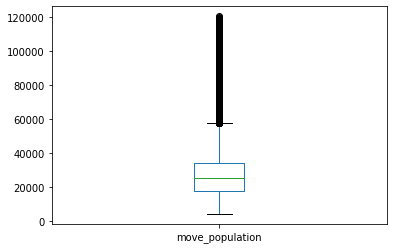

In [29]:
df[ [ 'move_population' ] ].plot( kind = 'box' )

### 4.1.2 요약 통계 결과 정보

In [42]:
print( '총 data 수                 : {}건'.format( df.date.count() ) )
print( '총 유동인구 수             : {}명'.format( df.move_population.sum() ) )
print( '\n평균 유동인구 수           : {:10.2f}명'.format( df.move_population.mean() ) )
print( '일 최대 유동인구 수        : {:10.2f}명'.format( df.move_population.max() ) )
print( '일 최소 유동인구 수        : {:10.2f}명'.format( df.move_population.min() ) )
print( "유동 인구에 대한 1사분위수 : {:10.2f}명".format( df.move_population.quantile( 0.25 ) ) )
print( "유동 인구에 대한 중앙값    : {:10.2f}명".format( df.move_population.median() ) )
print( "유동 인구에 대한 3사분위수 : {:10.2f}명".format( df.move_population.quantile( 0.75 ) ) )
print( '\n유동 인구에 대한 분산      : {:.2f}'.format( df.move_population.var() ) )
print( '유동 인구에 대한 표준편차  : {:.2f}'.format( df.move_population.std() ) )

총 data 수                 : 216000건
총 유동인구 수             : 5889837540명

평균 유동인구 수           :   27267.77명
일 최대 유동인구 수        :  120640.00명
일 최소 유동인구 수        :    4380.00명
유동 인구에 대한 1사분위수 :   18070.00명
유동 인구에 대한 중앙값    :   25470.00명
유동 인구에 대한 3사분위수 :   34090.00명

유동 인구에 대한 분산      : 155761043.81
유동 인구에 대한 표준편차  : 12480.43


# 5. EDA

## 5.1 날짜별 유동 인구 분석

In [63]:
date_population = []
for i in range( date_list.size ):
    mask = date_list[ i ] == df.date
    result = df.loc[ mask ]
    date_population.append( result.move_population.sum() )

In [92]:
s = pd.Series( date_population, index = date_list )

daily_mean = s.mean()
daily_max = s.max()
daily_max_index = s.argmax()
daily_min = s.min()
daily_min_index = s.argmin()

In [93]:
for date in date_list:
    print( '( {:}일 ) 총 유동인구는 [ {:8d}명 ]'.format( date, s[ date ] )  )

( 20200401일 ) 총 유동인구는 [ 200208500명 ]
( 20200402일 ) 총 유동인구는 [ 199791200명 ]
( 20200403일 ) 총 유동인구는 [ 199136720명 ]
( 20200404일 ) 총 유동인구는 [ 191161060명 ]
( 20200405일 ) 총 유동인구는 [ 189696320명 ]
( 20200406일 ) 총 유동인구는 [ 199919630명 ]
( 20200407일 ) 총 유동인구는 [ 199803760명 ]
( 20200408일 ) 총 유동인구는 [ 199655110명 ]
( 20200409일 ) 총 유동인구는 [ 199541470명 ]
( 20200410일 ) 총 유동인구는 [ 199091080명 ]
( 20200411일 ) 총 유동인구는 [ 191032010명 ]
( 20200412일 ) 총 유동인구는 [ 189643560명 ]
( 20200413일 ) 총 유동인구는 [ 199241850명 ]
( 20200414일 ) 총 유동인구는 [ 199278710명 ]
( 20200415일 ) 총 유동인구는 [ 192381520명 ]
( 20200416일 ) 총 유동인구는 [ 199059920명 ]
( 20200417일 ) 총 유동인구는 [ 199406670명 ]
( 20200418일 ) 총 유동인구는 [ 190872120명 ]
( 20200419일 ) 총 유동인구는 [ 189951850명 ]
( 20200420일 ) 총 유동인구는 [ 199629090명 ]
( 20200421일 ) 총 유동인구는 [ 199479870명 ]
( 20200422일 ) 총 유동인구는 [ 199512800명 ]
( 20200423일 ) 총 유동인구는 [ 199370110명 ]
( 20200424일 ) 총 유동인구는 [ 199139940명 ]
( 20200425일 ) 총 유동인구는 [ 191227460명 ]
( 20200426일 ) 총 유동인구는 [ 189159070명 ]
( 20200427일 ) 총 유동인구는 [ 199196700명 ]
(

In [99]:
print( '일 평균 유동 인구수       : [ {:10.2f}명 ]\n'.format( daily_mean ) )
print( '유동 인구수가 가장 많은날 : {} [ {:10.2f}명 ]'.format( date_list[ daily_max_index ], daily_max ) )
print( '유동 인구수가 가장 적은날 : {} [ {:10.2f}명 ]'.format( date_list[ daily_min_index ], daily_min ) )

일 평균 유동 인구수       : [ 196327918.00명 ]

유동 인구수가 가장 많은날 : 20200401 [ 200208500.00명 ]
유동 인구수가 가장 적은날 : 20200430 [ 186668960.00명 ]


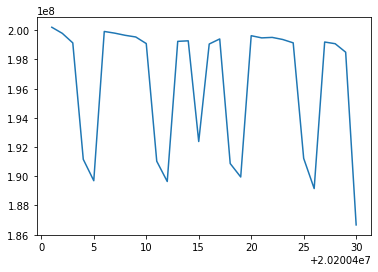

In [85]:
s.plot()

In [57]:
index = df.move_population.idxmin()
print( '유동 인구수가 가장 적은 날 정보 : {}/{:2d}시 연령( {}대 ) 성별( {} ) {:<8s}  [ {:8d}명 ]'.format( df.loc[ index, 'date' ], 
                                                                                                          df.loc[ index, 'time' ],
                                                                                                          df.loc[ index, 'age' ],
                                                                                                          df.loc[ index, 'gender' ],
                                                                                                          df.loc[ index, 'gu' ].strip(),
                                                                                                          df.loc[ index, 'move_population' ] ) )
index = df.move_population.idxmax()
print( '유동 인구수가 가장 많은 날 정보 : {}/{:2d}시 연령( {}대 ) 성별( {} ) {:<8s} [ {:8d}명 ]'.format( df.loc[ index, 'date' ], 
                                                                                                         df.loc[ index, 'time' ],
                                                                                                         df.loc[ index, 'age' ],
                                                                                                         df.loc[ index, 'gender' ],
                                                                                                         df.loc[ index, 'gu' ].strip(),
                                                                                                         df.loc[ index, 'move_population' ] ) )

유동 인구수가 가장 적은 날 정보 : 20200426/ 3시 연령( 70대 ) 성별( 남성 ) 중구        [     4380명 ]
유동 인구수가 가장 많은 날 정보 : 20200428/14시 연령( 30대 ) 성별( 여성 ) 강남구      [   120640명 ]


## 5.2 성별 유동 인구 분석

In [123]:
gender_population = []
for i in range( gender_list.size ):
    mask = gender_list[ i ] == df.gender
    result = df.loc[ mask ]
    gender_population.append( result.move_population.sum() )

In [124]:
s = pd.Series( gender_population, index = gender_list )

daily_mean = s.mean()
daily_max = s.max()
daily_max_index = s.argmax()
daily_min = s.min()
daily_min_index = s.argmin()

In [125]:
for gender in gender_list:
    print( '( {:} ) 총 유동인구는 [ {:10d}명 ]'.format( gender, s[ gender ] )  )

( 남성 ) 총 유동인구는 [ 2851648900명 ]
( 여성 ) 총 유동인구는 [ 3038188640명 ]


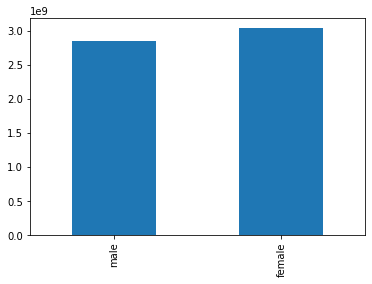

In [126]:
s.index = [ 'male', 'female' ]
s.plot( kind = 'bar' )

## 5.3 연령대별 유동 인구 분석

In [129]:
age_population = []
for i in range( age_list.size ):
    mask = age_list[ i ] == df.age
    result = df.loc[ mask ]
    age_population.append( result.move_population.sum() )

In [130]:
s = pd.Series( age_population, index = age_list )

daily_mean = s.mean()
daily_max = s.max()
daily_max_index = s.argmax()
daily_min = s.min()
daily_min_index = s.argmin()

In [131]:
for age in age_list:
    print( '( {:}대 ) 총 유동인구는 [ {:>10d}명 ]'.format( age, s[ age ] )  )

( 20대 ) 총 유동인구는 [ 1089342970명 ]
( 30대 ) 총 유동인구는 [ 1211368990명 ]
( 50대 ) 총 유동인구는 [ 1124325220명 ]
( 40대 ) 총 유동인구는 [ 1204134560명 ]
( 70대 ) 총 유동인구는 [  542005390명 ]
( 60대 ) 총 유동인구는 [  718660410명 ]


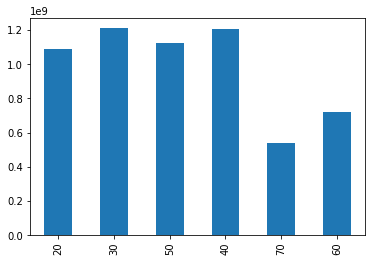

In [132]:
s.plot( kind = 'bar' )

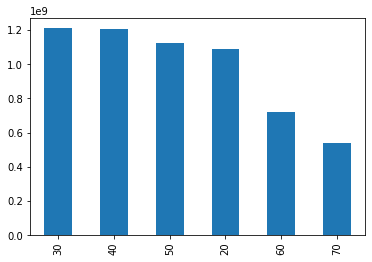

In [139]:
s.sort_values( ascending = False ).plot( kind = 'bar' )

In [46]:
# 강남구 인덱스 추출
index_list = np.where( gu_list[ 0 ] == df.gu )
indexs = df.loc[ index_list ]
indexs

,date,time,age,gender,gu,move_population
0,20200401,0,20,남성,도봉구,21490
38,20200401,12,50,남성,도봉구,17510
44,20200401,14,60,여성,도봉구,16340
64,20200401,21,50,남성,도봉구,25380
74,20200401,23,60,여성,도봉구,18820
...,...,...,...,...,...,...
215924,20200430,5,20,여성,도봉구,21880
215963,20200430,14,50,여성,도봉구,24810
215970,20200430,15,60,남성,도봉구,15030
215992,20200430,22,20,여성,도봉구,19670


In [57]:
print( '{} 전체 유동 인구수 : {:10d}명'.format( gu_unique[ 0 ], population_array[ indexs ].sum() ) )
print( '{} 평균 유동 인구수 : {:10.2f}명'.format( gu_unique[ 0 ], population_array[ indexs ].mean() ) )

도봉구 전체 유동 인구수 :  172730720명
도봉구 평균 유동 인구수 :   19991.98명


In [48]:
# 강남구 index 추출
total = 0
print( '{} 일자별 유동 인구 :'.format( gu_unique[ 0 ] ) )
for index in indexs:
    print( '{}-{} : {} {}명'.format( date_array[ index ], time_array[ index ], 
                                     gender_array[ index ], population_array[ index ] ) )

도봉구 일자별 유동 인구 :
20200401-00 : 남성 21490명
20200401-12 : 남성 17510명
20200401-14 : 여성 16340명
20200401-21 : 남성 25380명
20200401-23 : 여성 18820명
20200402-09 : 여성 17490명
20200402-14 : 여성 24060명
20200402-19 : 남성 21860명
20200402-22 : 여성 27890명
20200403-08 : 남성 19040명
20200404-15 : 남성 22230명
20200405-04 : 남성 17270명
20200405-05 : 여성 22770명
20200405-05 : 여성 27750명
20200405-19 : 남성 19780명
20200406-11 : 여성 16210명
20200406-17 : 여성 17410명
20200406-18 : 남성 16840명
20200406-21 : 남성 25400명
20200406-23 : 여성 17450명
20200408-00 : 여성 28440명
20200408-04 : 남성 25950명
20200408-16 : 여성 15780명
20200409-00 : 남성 17350명
20200409-22 : 남성 12610명
20200410-01 : 여성 18830명
20200410-15 : 남성 16540명
20200411-01 : 여성 17430명
20200411-07 : 여성 27360명
20200412-07 : 남성 25100명
20200412-22 : 남성 23100명
20200413-11 : 여성 16390명
20200413-13 : 남성 13870명
20200413-23 : 남성 25570명
20200414-04 : 여성 28380명
20200414-19 : 여성 17250명
20200415-19 : 여성 21400명
20200415-20 : 여성 19300명
20200416-09 : 남성 17870명
20200416-13 : 여성 15910명
20200416-17 : 여성 22900명


20200426-06 : 남성 12220명
20200426-09 : 여성 18220명
20200426-12 : 여성 27130명
20200426-23 : 남성 12540명
20200427-03 : 여성 30250명
20200427-06 : 여성 27730명
20200427-21 : 남성 16720명
20200430-04 : 남성 17270명
20200430-19 : 여성 19670명
20200401-01 : 남성 21740명
20200401-05 : 남성 25470명
20200401-08 : 여성 24260명
20200401-21 : 남성 21420명
20200402-06 : 남성 12050명
20200402-11 : 여성 16340명
20200402-12 : 여성 24150명
20200403-22 : 남성 17010명
20200404-02 : 남성 17380명
20200404-08 : 남성 23050명
20200405-10 : 남성 12470명
20200405-13 : 여성 26940명
20200405-15 : 여성 17960명
20200406-06 : 남성 21450명
20200406-10 : 여성 16330명
20200406-18 : 남성 19270명
20200406-19 : 여성 26360명
20200407-00 : 남성 23550명
20200407-08 : 여성 26270명
20200407-16 : 여성 16850명
20200408-04 : 여성 17100명
20200408-15 : 여성 21790명
20200408-17 : 여성 15990명
20200409-02 : 남성 26020명
20200409-16 : 남성 14430명
20200409-22 : 여성 20960명
20200410-00 : 남성 21440명
20200410-09 : 여성 17350명
20200410-15 : 남성 16030명
20200410-17 : 여성 22950명
20200411-08 : 여성 21250명
20200411-15 : 남성 18510명
20200411-17 : 여성

20200422-14 : 여성 16190명
20200422-17 : 남성 11860명
20200423-14 : 남성 13880명
20200424-04 : 여성 28440명
20200424-05 : 여성 18250명
20200425-03 : 남성 21420명
20200425-12 : 여성 19440명
20200425-15 : 남성 12020명
20200425-22 : 여성 21790명
20200426-11 : 남성 20580명
20200426-15 : 남성 19020명
20200426-17 : 여성 20420명
20200427-16 : 남성 13500명
20200428-05 : 남성 25230명
20200428-12 : 남성 15360명
20200428-12 : 남성 12390명
20200429-07 : 여성 21050명
20200429-09 : 여성 22480명
20200429-12 : 여성 15980명
20200429-23 : 남성 24610명
20200430-04 : 남성 26510명
20200430-13 : 여성 24920명
20200430-14 : 남성 21270명
20200430-15 : 여성 16690명
20200401-10 : 여성 16450명
20200402-11 : 남성 16040명
20200403-04 : 여성 18540명
20200403-16 : 여성 16920명
20200403-20 : 여성 28390명
20200404-01 : 남성 25930명
20200404-02 : 여성 23190명
20200404-06 : 여성 27730명
20200404-07 : 여성 21900명
20200404-16 : 여성 26540명
20200405-17 : 남성 19500명
20200406-07 : 여성 16910명
20200407-22 : 남성 20540명
20200407-22 : 여성 27790명
20200407-23 : 남성 26310명
20200408-02 : 남성 26130명
20200408-04 : 여성 23460명
20200408-06 : 여성

20200420-04 : 여성 22220명
20200420-07 : 남성 19970명
20200420-08 : 남성 13880명
20200420-09 : 남성 17850명
20200420-11 : 여성 24550명
20200420-17 : 남성 19820명
20200420-18 : 남성 22250명
20200421-07 : 남성 19700명
20200421-12 : 남성 17140명
20200421-15 : 남성 13960명
20200421-15 : 여성 24190명
20200421-18 : 남성 16850명
20200421-18 : 남성 12180명
20200422-01 : 여성 30490명
20200422-14 : 남성 16960명
20200422-14 : 여성 16390명
20200422-16 : 여성 15750명
20200423-02 : 여성 28460명
20200423-02 : 남성 17400명
20200423-06 : 남성 21020명
20200423-11 : 여성 22110명
20200423-11 : 여성 16050명
20200424-02 : 여성 18740명
20200424-07 : 여성 21010명
20200425-06 : 남성 21430명
20200425-06 : 여성 21620명
20200425-08 : 여성 21070명
20200426-02 : 남성 23280명
20200426-07 : 여성 21550명
20200426-12 : 남성 24030명
20200426-13 : 남성 12420명
20200426-18 : 남성 12450명
20200427-04 : 여성 18440명
20200427-12 : 여성 16150명
20200427-22 : 남성 24390명
20200428-03 : 여성 30210명
20200428-17 : 남성 16560명
20200429-04 : 여성 30010명
20200429-11 : 남성 16850명
20200429-17 : 남성 18850명
20200429-23 : 남성 21810명
20200430-06 : 남성

In [49]:
# 중구 인덱스 추출
indexs = np.where( gu_unique[ 23 ] == gu_array )
indexs = indexs[ 0 ]
indexs

array([    84,     93,    109, ..., 215931, 215968, 215972], dtype=int64)

In [50]:
print( '{} 전체 유동 인구수 : {:10d}명'.format( gu_unique[ 23 ], population_array[ indexs ].sum() ) )
print( '{} 평균 유동 인구수 : {:10.2f}명'.format( gu_unique[ 23 ], population_array[ indexs ].mean() ) )

서초구 전체 유동 인구수 :  293867470명
서초구 평균 유동 인구수 :   34012.44명


In [51]:
# 강남구 index 추출
total = 0
print( '{} 일자별 유동 인구 :'.format( gu_unique[ 23 ] ) )
for index in indexs:
    print( '{}-{} : {} {}명'.format( date_array[ index ], time_array[ index ], 
                                     gender_array[ index ], population_array[ index ] ) )

서초구 일자별 유동 인구 :
20200402-03 : 여성 29260명
20200402-06 : 여성 16450명
20200402-13 : 여성 65240명
20200403-02 : 남성 37640명
20200403-04 : 남성 30160명
20200404-07 : 남성 21020명
20200404-10 : 남성 13420명
20200404-16 : 남성 34610명
20200404-21 : 남성 19640명
20200405-03 : 여성 29330명
20200405-05 : 남성 33080명
20200405-05 : 여성 37690명
20200405-08 : 여성 21500명
20200405-21 : 여성 21950명
20200405-22 : 여성 15500명
20200406-15 : 남성 67990명
20200406-22 : 여성 15780명
20200407-03 : 남성 19180명
20200407-08 : 여성 17610명
20200407-16 : 여성 17380명
20200409-08 : 남성 35550명
20200410-04 : 남성 25640명
20200410-15 : 여성 27050명
20200411-06 : 남성 34740명
20200411-19 : 남성 38430명
20200411-23 : 남성 28820명
20200411-23 : 남성 36170명
20200412-00 : 여성 31170명
20200412-01 : 여성 31020명
20200412-13 : 여성 33510명
20200412-18 : 남성 38200명
20200412-19 : 여성 22020명
20200413-07 : 남성 51970명
20200414-03 : 남성 37110명
20200414-18 : 남성 58370명
20200415-00 : 남성 19580명
20200415-02 : 남성 30240명
20200415-06 : 남성 34450명
20200415-06 : 여성 32440명
20200415-14 : 여성 39860명
20200415-17 : 남성 40400명


20200405-06 : 남성 11940명
20200405-14 : 여성 22240명
20200405-16 : 여성 40270명
20200406-00 : 여성 38210명
20200406-09 : 남성 25730명
20200406-12 : 여성 54880명
20200406-17 : 여성 51700명
20200406-17 : 여성 17020명
20200406-18 : 남성 22580명
20200407-11 : 남성 67380명
20200407-13 : 남성 40070명
20200407-17 : 여성 16990명
20200408-00 : 남성 19640명
20200408-03 : 여성 29300명
20200408-08 : 여성 26490명
20200408-19 : 남성 34410명
20200408-23 : 남성 27330명
20200409-05 : 여성 39340명
20200410-22 : 여성 15680명
20200411-20 : 여성 21720명
20200412-10 : 남성 30940명
20200412-13 : 여성 41120명
20200412-14 : 남성 31500명
20200412-21 : 남성 30790명
20200412-22 : 남성 12350명
20200413-07 : 여성 24760명
20200413-10 : 남성 39260명
20200414-01 : 여성 39070명
20200415-18 : 남성 19860명
20200415-22 : 남성 35290명
20200416-05 : 여성 32570명
20200416-08 : 남성 62890명
20200416-22 : 여성 15820명
20200417-01 : 여성 29510명
20200417-01 : 남성 34410명
20200417-02 : 여성 38330명
20200417-08 : 여성 56920명
20200418-05 : 남성 31000명
20200418-07 : 여성 16040명
20200418-13 : 여성 16700명
20200418-17 : 남성 12900명
20200418-20 : 여성

20200425-01 : 남성 12270명
20200425-08 : 남성 34490명
20200425-09 : 여성 16990명
20200425-23 : 남성 30520명
20200425-23 : 여성 20980명
20200426-10 : 여성 33960명
20200426-14 : 남성 31660명
20200426-16 : 여성 22400명
20200426-22 : 남성 37690명
20200427-01 : 남성 34000명
20200427-03 : 남성 26060명
20200427-04 : 여성 31790명
20200427-17 : 남성 66530명
20200427-19 : 남성 13210명
20200428-01 : 여성 21970명
20200428-12 : 여성 56680명
20200428-15 : 남성 68420명
20200428-15 : 여성 55520명
20200428-22 : 남성 29570명
20200429-03 : 여성 15490명
20200429-10 : 여성 43780명
20200429-12 : 남성 68840명
20200429-14 : 남성 26360명
20200430-09 : 여성 35060명
20200430-17 : 여성 38240명
20200401-01 : 여성 39220명
20200401-09 : 남성 65610명
20200401-10 : 남성 67280명
20200401-16 : 남성 14230명
20200401-17 : 여성 62440명
20200401-19 : 남성 21700명
20200401-21 : 여성 42360명
20200402-08 : 남성 24930명
20200402-20 : 여성 16030명
20200403-00 : 남성 26820명
20200403-08 : 여성 49520명
20200403-22 : 여성 39880명
20200404-04 : 남성 18930명
20200404-08 : 남성 21460명
20200404-13 : 남성 21310명
20200404-17 : 남성 34120명
20200404-18 : 여성

20200420-17 : 여성 62500명
20200420-19 : 여성 16210명
20200421-03 : 남성 29950명
20200421-10 : 남성 26590명
20200421-15 : 여성 54980명
20200421-19 : 남성 51100명
20200423-10 : 남성 67580명
20200423-20 : 여성 43250명
20200424-11 : 남성 67080명
20200424-21 : 여성 22460명
20200424-22 : 남성 32810명
20200425-04 : 여성 21290명
20200426-10 : 여성 33300명
20200426-12 : 여성 22360명
20200427-22 : 남성 31970명
20200428-04 : 여성 32040명
20200428-15 : 남성 15320명
20200429-00 : 남성 35400명
20200429-06 : 여성 40190명
20200429-09 : 남성 49240명
20200430-00 : 여성 30970명
20200430-04 : 남성 11920명
20200430-07 : 여성 38870명
20200430-16 : 남성 33780명
20200430-23 : 남성 32610명
20200401-03 : 여성 39120명
20200401-04 : 여성 32260명
20200401-07 : 남성 56600명
20200401-13 : 여성 55060명
20200402-14 : 여성 54600명
20200402-17 : 여성 16850명
20200403-00 : 여성 39410명
20200403-01 : 여성 22060명
20200403-04 : 남성 19230명
20200403-06 : 여성 34210명
20200403-09 : 여성 52230명
20200403-11 : 여성 28370명
20200404-01 : 남성 37290명
20200404-19 : 여성 15640명
20200405-08 : 남성 19130명
20200405-12 : 남성 19190명
20200406-03 : 남성